<a href="https://colab.research.google.com/github/srbhktyr/Data-preprocessing-and-analysis-Using-Pyspark/blob/main/data_preprocessing_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Notebook**

### Let's mount the google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 59.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=db31221ef8cc0e493a1c5486af37d1a91c18ac51e04fa9b6edaa53f70e746edc
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


Importing the modules 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plt

creating spark session

In [ ]:
spark = SparkSession.builder.appName("spark_app").getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [ ]:
from zmq.constants import IntFlag
listening_csv_path = '/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.csv(listening_csv_path, header = True, 
                              inferSchema=True)

let's check the data:

In [ ]:
listening_df.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



let's delete useless columns:

In [ ]:
listening_df =  listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df = listening_df.dropna()

let's check the dataset again:

In [ ]:
listening_df.show(10)

+-----------+--------------------+------------+--------------------+
|    user_id|               track|      artist|               album|
+-----------+--------------------+------------+--------------------+
|000Silenced|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|       Robyn|            Be Mine!|
|000Silenced|            Acapella|       Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|   The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|    MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|     Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|   Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|      Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|Napalm Death|Time Waits For No...|
+-----------+--------------------+------------+--------------------+
only showing top 10 rows



let's see the schema: 

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [ ]:
shape = (listening_df.count(), len(listening_df.columns))
shape

(13758905, 4)

# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
listening_df.select('artist', 'track').show(5)

+---------+--------------------+
|   artist|               track|
+---------+--------------------+
| Jessie J|           Price Tag|
| Jessie J|Price Tag (Acoust...|
|    Robyn|Be Mine! (Ballad ...|
|    Kelis|            Acapella|
|The Tease|   I'm Not Invisible|
+---------+--------------------+
only showing top 5 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
listening_df.select('*').filter(listening_df.artist == "Rihanna").show(5)

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
+-----------+--------------------+-------+--------------------+
only showing top 5 rows



**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [ ]:
# q3 = listening_df.select('track').groupBy('track').count().alias('count').orderBy(desc('count'))
# q3.show()
## above method mmay count wrongly as tere might be same name with different artist

q3= listening_df.select('track', 'artist').groupBy('track', 'artist').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+----------------+--------------+-----+
|           track|        artist|count|
+----------------+--------------+-----+
|           Sorry| Justin Bieber| 3381|
|Do I Wanna Know?|Arctic Monkeys| 2865|
|     Skinny Love|      Bon Iver| 2836|
|      PILLOWTALK|          Zayn| 2701|
|   Mr Brightside|   The Killers| 2690|
|            Work|       Rihanna| 2646|
|         Pompeii|      Bastille| 2606|
| Little Lion Man|Mumford & Sons| 2520|
|        The Cave|Mumford & Sons| 2485|
|   Love Yourself| Justin Bieber| 2481|
+----------------+--------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [ ]:
q4 = listening_df.select('track', 'artist').filter(listening_df.artist =='Rihanna').groupBy('track').count().alias('count').orderBy(desc('count')).limit(10)
q4.show()

+--------------------+-----+
|               track|count|
+--------------------+-----+
|                Work| 2646|
|Only Girl (In the...| 1749|
|We Found Love (fe...| 1575|
|                 S&M| 1307|
|            Rude Boy| 1303|
|            Diamonds| 1224|
|      Kiss it Better|  945|
| Where Have You Been|  844|
|Cheers (Drink to ...|  697|
|           Desperado|  679|
+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [ ]:
q5 = listening_df.select('artist','album').groupBy('album', 'artist').agg(count('album').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|               album|              artist|count|
+--------------------+--------------------+-----+
|   The Life Of Pablo|          Kanye West|22310|
|                  xx|              The xx|14195|
|                  AM|      Arctic Monkeys|14090|
|     An Awesome Wave|               alt-J|13635|
|        Sigh No More|      Mumford & Sons|13543|
|Whatever People S...|      Arctic Monkeys|12731|
|            For Emma|            Bon Iver|11994|
|          Art Angels|              Grimes|11655|
|               Lungs|Florence + the Ma...|11362|
|                  21|               Adele|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
genre_path = '/content/drive/MyDrive/dataset/genre.csv'
genre_df = spark.read.csv(genre_path, header=True, inferSchema=True)
genre_df.show(5)

+----------+-----+
|    artist|genre|
+----------+-----+
|      Muse| rock|
|   Nirvana| rock|
|  Bon Jovi| rock|
|The Police| rock|
|      Kiss| rock|
+----------+-----+
only showing top 5 rows



let's check the data

Let's inner join these two data frames

In [ ]:
data = listening_df.join(genre_df, how= 'inner', on=['artist'])
data.show(5)

+--------+-----------+--------------------+-----------+--------------------+
|  artist|    user_id|               track|      album|               genre|
+--------+-----------+--------------------+-----------+--------------------+
|Jessie J|000Silenced|           Price Tag|Who You Are| Ariana Grande & ...|
|Jessie J|000Silenced|           Price Tag|Who You Are| Jhene Aiko & Rixton|
|Jessie J|000Silenced|           Price Tag|Who You Are| Nicki Minaj & Ar...|
|Jessie J|000Silenced|           Price Tag|Who You Are|                 pop|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Ariana Grande & ...|
+--------+-----------+--------------------+-----------+--------------------+
only showing top 5 rows



**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6 = data.select('user_id').filter(data.genre == 'pop').groupBy('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
q7 = data.select('genre').groupBy('genre').agg(count('genre').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
q8_1 = data.select('user_id', 'genre').groupBy('user_id', 'genre').agg(count('*').alias('count')).orderBy('user_id')
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph| Boston Pops Orch...|    1|
| --Seph|                 pop|    9|
| --Seph|          Nils Frahm|    1|
| --Seph|               dance|    1|
| --Seph|  progressive trance|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|               Ruben|    4|
| --Seph|           classical|   31|
| --Seph|               indie|    3|
| --Seph|         heavy metal|    1|
| --Seph|                punk|    3|
| --Seph|           anti-folk|    3|
| --Seph|               house|    3|
| --Seph|              Xzibit|    4|
| --Seph|          electropop|    1|
| --Seph| Orchestra of Wel...|    1|
| --Seph|   Alesso Feat Hurts|    1|
| --Seph|       Sara Mingardo|    1|
| --Seph| Sir Colin Davis ...|    1|
| --Seph|          indie rock|   15|
+-------+--------------------+-----+
only showing top 20 rows



In [ ]:
q8_2 = q8_1.groupBy('user_id').agg(max(struct(col('count'), col('genre'))).alias('max')).select('user_id','max.genre')
q8_2.show(5)

+----------+-----+
|   user_id|genre|
+----------+-----+
| --Shinn--| rock|
|  --ollz--| rock|
|-Amnesiac-|metal|
|    -Bish-| rock|
|   -Danni-| rock|
+----------+-----+
only showing top 5 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [ ]:
q9 = genre_df.select('genre').filter((genre_df.genre == 'pop') | (genre_df.genre == 'rock') | (genre_df.genre == 'metal') |
                                     (genre_df.genre == 'hip hop')).groupBy('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

now lets visualize these two lists using a bar chart

In [ ]:
q9_list = q9.collect()

In [ ]:
lables = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

<BarContainer object of 4 artists>

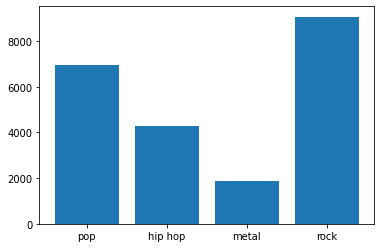

In [ ]:
plt.bar(lables, counts)